# Model Training

## 1.1 Import Data and Required Packages


In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

In [25]:
df_features = pd.read_csv("data/train_values.csv")
df_labels = pd.read_csv("data/train_labels.csv")

In [26]:
df = pd.merge(df_features, df_labels, on='building_id')
df = df.drop(columns='building_id')

### Preparing X and y variables

In [27]:
X = df.drop(columns = ["damage_grade"])
y = df["damage_grade"]

In [30]:
### Sanity Check
print(f"Shape of X={(X.shape)}, Shape of y={(y.shape)}")

Shape of X=(260601, 38), Shape of y=(260601,)


### Convert categorical data to numerical data

In [31]:
cat_features = ['land_surface_condition', 'foundation_type', 'roof_type','ground_floor_type', 
                          'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
# label encoding categorical columns in train dataset 
X[label_encoding_columns] = X[label_encoding_columns].apply(lambda x: x.astype('category').cat.codes)

### Scaling the dataset

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting into train, validation and test sets

In [35]:
RANDOM_SEED = 42

* Number of data points in Train set : 70 % of total no. of data points
* Number of data points in Validation set : 10 % of total no. of data points
* Number of data points in Test set : 20 % of total no. of data points


In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [88]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size = 0.1, random_state=RANDOM_SEED)

In [89]:
total = X.shape[0]
print({X_train.shape[0] / total})
print(X_val.shape[0] / total)
print(X_test.shape[0] / total)

0.6999973139013281
0.023998372991661583
0.21600070606022234


### Create an Evaluation function to give all metrics after model Training

In [94]:
def evaluate_model(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

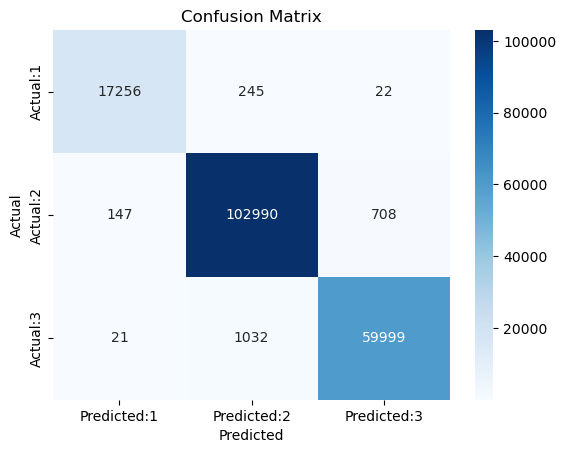

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     17523
           2       0.99      0.99      0.99    103845
           3       0.99      0.98      0.99     61052

    accuracy                           0.99    182420
   macro avg       0.99      0.99      0.99    182420
weighted avg       0.99      0.99      0.99    182420



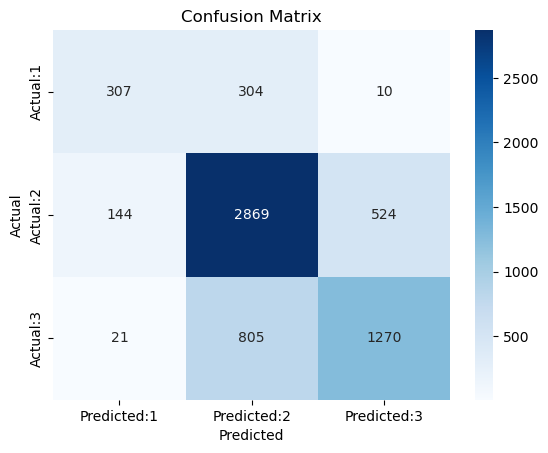

              precision    recall  f1-score   support

           1       0.65      0.49      0.56       621
           2       0.72      0.81      0.76      3537
           3       0.70      0.61      0.65      2096

    accuracy                           0.71      6254
   macro avg       0.69      0.64      0.66      6254
weighted avg       0.71      0.71      0.71      6254

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9881
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7109




KeyboardInterrupt: 

In [101]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier()
}

model_list = []
f1_micro = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Evaluate Train and Validation dataset
    model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_val_f1 = evaluate_model(y_val, y_val_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
    print("--------------------------------------")
    
    print("Model Performance for Validation Set")
    print("F1 Micro-Averaged Score: {:.4f}".format(model_val_f1))
    
    f1_micro.append(model_val_f1)
    
    print('='*35)
    print('\n')

### Results

In [ ]:
pd.DataFrame(list(zip(model_list, f1_micro)), columns=['Model Name', 'Micro Averaged F1-Score']).sort_values(by=["Micro Averaged F1-Score"],ascending=False)